<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week12-SVM/SVM-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Credit: https://github.com/python-engineer/MLfromscratch
import numpy as np 
import matplotlib.pyplot as plt
import random

class SVM:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.penalty_rate = 0.01

    def fit(self, X, y):
        n_samples, n_features = X.shape  
        self.w = np.array([0,0])
        self.b = 0
        X_ = X
        y_ = y
        self.d = 1

        for i in range(self.n_iters):

            '''c = list(zip(X, y))
            random.shuffle(c)
            X_, y_ = zip(*c)'''
            
            #idx is index, x_i is a vector
            for idx, x_i in enumerate(X_):
                
                eq = y_[idx] * (np.dot(x_i, self.w) + self.b)
                
                condition = eq >= self.d
                
                if condition:
                    self.w = self.w - self.lr * (self.penalty_rate * self.w)
                else: #misclassified
                    self.w = self.w - self.lr * ( self.penalty_rate * self.w - np.multiply(x_i, y_[idx]))
                
                self.b = self.b - self.lr * (-1 * y_[idx])
                
                #print("i= ",i," W = ",self.w," b = ",self.b)

            if i == self.n_iters-1:
              self.visualize_svm(self.w, self.b, X, y)
                   
    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)
    
    def visualize_svm(self, w, b,X,y):

        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        plt.scatter(X[:,0], X[:,1], marker='o',c=y)
        plt.xlim(-20, 20)
        plt.ylim(-20, 20)

        x0_1 = np.amin(X[:,0])
        x0_2 = np.amax(X[:,0])

        x1_1 = get_hyperplane_value(x0_1, w, b, 0)
        x1_2 = get_hyperplane_value(x0_2, w, b, 0)

        x1_1_m = get_hyperplane_value(x0_1, w, b, -self.d)
        x1_2_m = get_hyperplane_value(x0_2, w, b, -self.d)

        x1_1_p = get_hyperplane_value(x0_1, w, b, self.d)
        x1_2_p = get_hyperplane_value(x0_2, w, b, self.d)

        ax.plot([x0_1, x0_2],[x1_1, x1_2], 'b--')
        ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'g')
        ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'r')

        x1_min = np.amin(X[:,1])
        x1_max = np.amax(X[:,1])
        ax.set_ylim([x1_min-3,x1_max+3])

        plt.show()

    

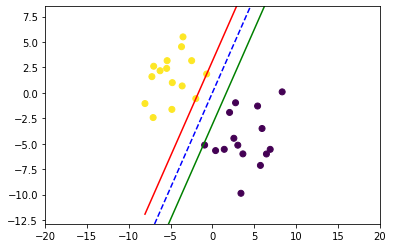

Our w= [-0.60025687  0.32138471]  b= 0.0
LinearSVC  [[-0.49778129  0.32343196]]   [0.20091118]
SVC  [[-0.39169685  0.34787076]]   [0.4245412]


In [25]:
import numpy as np
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

X, y =  datasets.make_blobs(n_samples=30, n_features=2, centers=2, cluster_std=2, random_state=123)

'''X = np.array([[3.38,-8.34],
              [-4.41,-10.11],
              [2.31,-10.07],
              [-4.73,-10],
              [15,8]])
y = np.array([1,0,1,0,1])'''

y = np.where(y == 0, -1, 1)
#print(X, " ", y)

clf = SVM( n_iters=10000)
clf.fit(X, y)
print("Our w=", clf.w, " b=", clf.b)


clf2 = LinearSVC(loss="hinge")
clf2.fit(X,y)
print("LinearSVC ",clf2.coef_," ",clf2.intercept_)

#Recommend
clf3 = SVC(kernel="linear")
clf3.fit(X,y)
print("SVC ",clf3.coef_," ",clf3.intercept_)


# Exercise
1. Create a hinge loss function and use it to check when to stop training.
2. Implement Stochastic GD version.